# 📘 K-Means Clustering 
## 🧠 K-Means 
K-Means is one of the most popular unsupervised machine learning algorithms, mainly used for clustering. It partitions the data into K clusters where each data point belongs to the cluster with the nearest mean (centroid).

---

## 📌 Clustering
Clustering is the task of grouping similar data points together without predefined labels. The goal is to find inherent patterns or groupings in the data.

---

# Key Formulas

## 📌 1. Euclidean Distance Formula

Used to calculate the distance between a data point and a centroid:

$$
\text{Distance} = \sqrt{(x_1 - c_1)^2 + (x_2 - c_2)^2 + \dots + (x_n - c_n)^2}
$$

Where:
- \( x = [x₁, x₂, ..., xₙ] \): feature values of a data point
- \( c = [c₁, c₂, ..., cₙ] \): feature values of a centroid

---

## 📌 2. Cluster Assignment Rule

Assign each point \( X \) to the nearest cluster $( Cj )$:


$$
\text{Cluster}(x_i) = \arg\min_{j} \ \text{Distance}(x_i, \mu_j)
$$

Where:
- $( \mu_j )$ is the centroid of cluster \( j \)

---

## 📌 3. Centroid Update Formula

After all points are assigned to clusters, update each centroid:

$$
\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
$$

Where:
- $( \mu_j )$: new centroid of cluster \( j \)  
- $( C_j )$: set of points assigned to cluster \( j \)  
- $( |C_j| )$: number of points in cluster \( j \)

---

## 📌 4. Objective Function (Inertia / SSE)

The goal of K-Means is to minimize the **total within-cluster sum of squared distances (WCSS)**:

$$
J = \sum_{j=1}^{K} \sum_{x_i \in C_j} \|x_i - \mu_j\|^2
$$

Where:
- $( J )$: total cost or distortion  
- $( \|x_i - \mu_j\|^2 )$: squared distance between a point and its cluster centroid

---

## 🎯 Bonus: Elbow Method (Choosing K)

To find the optimal number of clusters \( K \), plot:

$$
K \text{ vs. } \text{WCSS}
$$

Look for the "elbow" point where additional clusters don't significantly reduce WCSS.

---


In [1]:
# Import Required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Read the csv as DataFrame

I use preprocessed dataset in this project, I f you want to see the PreProcessing steps of the dataset kindly refer - https://github.com/Namachivayam2001/ML-Tutorials/blob/main/Simple_Linear_Regression.ipynb

In [2]:
df = pd.read_csv('https://github.com/Namachivayam2001/Public_Datasets/raw/main/preprocessed_synthetic_online_retail_data.csv')
df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age,order_month
0,13542,2024-12-17,784,10,1,16,2,373.36,2,522,1.0,0,56,12
1,23188,2024-06-01,682,50,4,18,5,299.34,2,668,5.0,1,59,6
2,55098,2025-02-04,684,50,4,22,5,23.00,2,942,5.0,0,64,2
3,65208,2024-10-28,204,40,0,19,2,230.11,0,244,5.0,1,34,10
4,63872,2024-05-10,202,20,2,15,4,176.72,2,281,1.0,0,33,5


### In this tutorial I can use 15 records of `product_name` from the dataset to build a K-Means Model

In [3]:
df = df[['product_name']][:15]
df

,product_name
0,16
1,18
2,22
3,19
4,15
5,16
6,21
7,24
8,12
9,1


### Standerdize the input

In [4]:
# Standardize the data
scaler = StandardScaler()
df['scaled'] = scaler.fit_transform(df)

In [5]:
df

,product_name,scaled
0,16,0.249236
1,18,0.574325
2,22,1.224505
3,19,0.736870
4,15,0.086691
5,16,0.249236
6,21,1.061960
7,24,1.549595
8,12,-0.400944
9,1,-2.188938


### Visualize Scaled Data

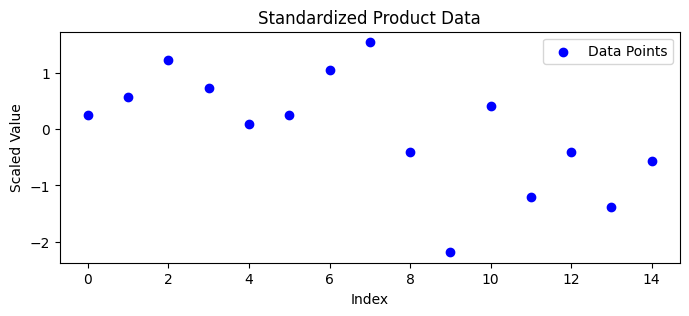

In [6]:
plt.figure(figsize=(8, 3))
plt.scatter(df.index, df['scaled'], color='blue', label='Data Points')
plt.title('Standardized Product Data')
plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()


### Create a Model

In [17]:
# Range of clusters to try
inertia = []
ranges = range(1, 11)

for k in ranges:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[['scaled']])
    inertia.append(kmeans.inertia_)

In [18]:
# Create a DataFrame for Seaborn plotting
elbow_df = pd.DataFrame({
    'n_clusters': list(ranges),
    'Inertia': inertia
})
elbow_df

,n_clusters,Inertia
0,1,15.000000
1,2,4.513563
2,3,2.069382
3,4,0.973168
4,5,0.440348
5,6,0.220174
6,7,0.110087
7,8,0.074859
8,9,0.057245
9,10,0.039631


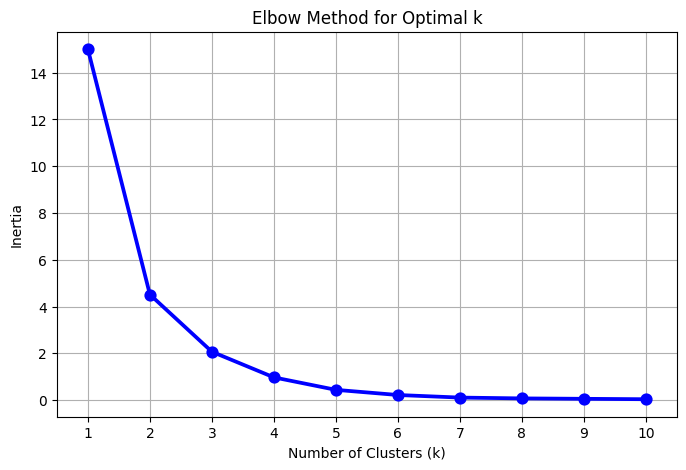

In [19]:
# Plot the Elbow Method chart
plt.figure(figsize=(8, 5))
sns.pointplot(x='n_clusters', y='Inertia', data=elbow_df, marker='o', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

#### Now we use K=3

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
df['Cluster'] = kmeans.fit_predict(df[['scaled']])
print(f'cluster centers: {kmeans.cluster_centers_}')
df

cluster centers: [[ 0.02573628]
 [-1.59294033]
 [ 1.14323269]]


,product_name,scaled,Cluster
0,16,0.249236,0
1,18,0.574325,0
2,22,1.224505,2
3,19,0.736870,2
4,15,0.086691,0
5,16,0.249236,0
6,21,1.061960,2
7,24,1.549595,2
8,12,-0.400944,0
9,1,-2.188938,1


### Visualize the Clusters and it's centeroids

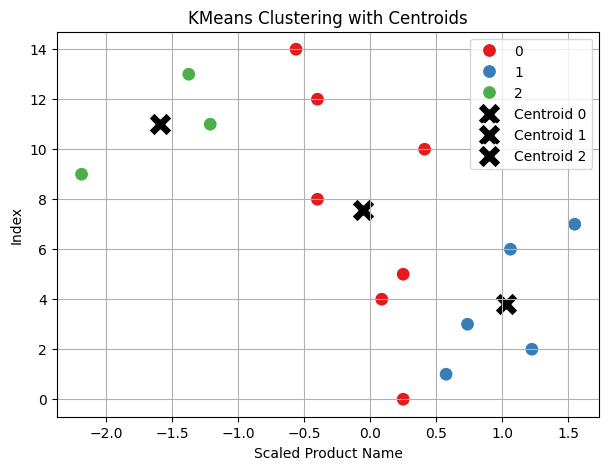

In [16]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    y=df.index,
    x='scaled',
    hue='Cluster',
    palette='Set1',
    s=100,
    data=df
)

# Plot centroids as 'X' markers
for idx, center in enumerate(kmeans.cluster_centers_):
    # Calculate y-position (mean index of cluster points)
    y_pos = df[df['Cluster'] == idx].index.values.mean()
    
    sns.scatterplot(
        y=[y_pos],
        x=[center[0]],
        marker='X',
        s=300,
        color='black',
        edgecolor='white',
        label=f'Centroid {idx}'
    )

plt.title('KMeans Clustering with Centroids')
plt.xlabel('Scaled Product Name')
plt.ylabel('Index')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
kmeans.cluster_centers_

array([[-0.0526336 ],
       [ 1.02945123],
       [-1.59294033]])